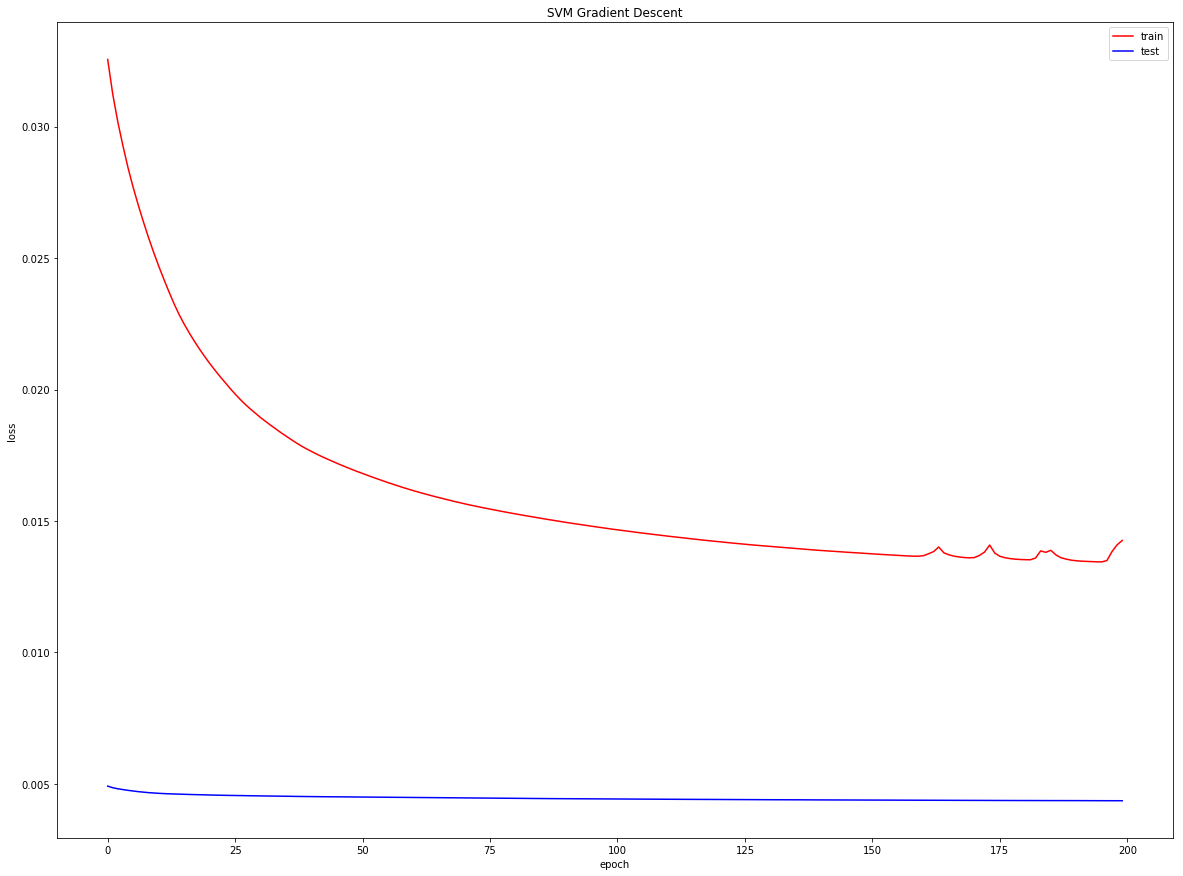

In [4]:
# %load classification.py
#!/usr/bin/env python2
"""
Created on Wed Dec 13 09:30:07 2017

@author: lrl
"""
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

x,y=load_svmlight_file("/home/lrl/ML-logits/classification/australian_scale")
x=x.todense()
m,n=np.shape(x)
y=y.reshape((m,1))
x_data=np.ones((m,n+1))
x_data[:,:-1]=x[:,:]

x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2)
w=np.random.random(size=(n+1,1))
def SVMGradDes(x,y,epoch,learning_rate,w,c):
    losses=[]
    for epoch in range(epoch):
        h=1-y*np.dot(x,w)
      
        tmp=np.where(h>0,y,0)
      
        w=w-learning_rate*(w-c*np.dot(x.T,tmp))
        #print w.shape
        y_predict=np.where(np.dot(x,w)>0,1,-1)
        loss=np.sum(w*w)+c*np.sum(np.maximum(1-y*np.dot(x,w),0))
        #print (y*np.dot(x,w)).shape
        #print loss.shape
       
        losses.append(loss/m)
  
    return losses,w
epoch=200
learning_rate=0.005
c=0.05
losses_train,w=SVMGradDes(x_train,y_train,epoch,learning_rate,w,c)

losses_test,w=SVMGradDes(x_test,y_test,epoch,learning_rate,w,c)

plt.figure(figsize=(20,15))
plt.plot(losses_train,color="r",label="train")
plt.plot(losses_test,color="b",label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("SVM Gradient Descent")
plt.show()